# Objective
  PJM Hourly Energy Consumption Data
  PJM Interconnection LLC (PJM) is a regional transmission organization (RTO) in the
  United States. It is part of the Eastern Interconnection grid operating an electric
  transmission system serving all or parts of Delaware, Illinois, Indiana, Kentucky,
  Maryland, Michigan, New Jersey, North Carolina, Ohio, Pennsylvania, Tennessee,
  Virginia, West Virginia, and the District of Columbia.

### Import Libraries


In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [22]:
pjme = pd.read_excel('PJMW_MW_Hourly.xlsx',index_col=[0] ,parse_dates = [0])
pjme.head()

,PJMW_MW
Datetime,
2002-12-31 01:00:00,5077
2002-12-31 02:00:00,4939
2002-12-31 03:00:00,4885
2002-12-31 04:00:00,4857
2002-12-31 05:00:00,4930


In [23]:
pjme.tail(5136)

,PJMW_MW
Datetime,
2017-01-02 00:00:00,5021
2018-08-02 01:00:00,5100
2018-08-02 02:00:00,4840
2018-08-02 03:00:00,4745
2018-08-02 04:00:00,4572
...,...
2018-01-01 20:00:00,8401
2018-01-01 21:00:00,8373
2018-01-01 22:00:00,8238


Start Datetime = 2002-12-31 01:00:00

End Datetime = 2018-01-02 00:00:00

For Train-Test Split = Train Date:138071(End Datetime:2017-01-02 00:00:00)  & Test Date:5135(Start Datetime:2018-08-02 01:00:00)


In [24]:
pjme.shape

(143206, 1)

In [25]:
pjme.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143206 entries, 2002-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   PJMW_MW  143206 non-null  int64
dtypes: int64(1)
memory usage: 2.2 MB


In [26]:
pjme.isna().sum()

PJMW_MW    0
dtype: int64

In [27]:
pjme.isnull().sum()

PJMW_MW    0
dtype: int64

In [28]:
pjme.describe().T

,count,mean,std,min,25%,50%,75%,max
PJMW_MW,143206.0,5602.375089,979.142872,487.0,4907.0,5530.0,6252.0,9594.0


In [29]:
pjme[pjme['PJMW_MW'] < 500]

,PJMW_MW
Datetime,
2003-05-29,487


In [30]:
pjme['PJMW_MW'] = pjme['PJMW_MW'].replace(['487'], '5602')

<AxesSubplot: xlabel='PJMW_MW', ylabel='Density'>

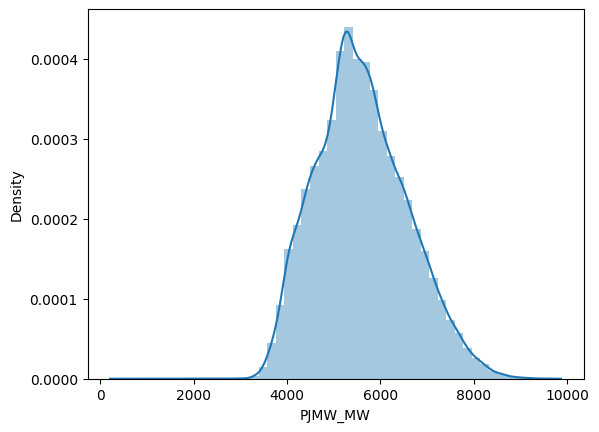

In [31]:
sns.distplot(pjme.PJMW_MW)

There is No skewness in the Dataset

In [32]:
pjme[pjme.duplicated()]

,PJMW_MW
Datetime,
2002-12-30 23:00:00,5885
2002-12-28 09:00:00,6167
2002-12-28 13:00:00,6178
2002-12-28 16:00:00,5962
2002-12-28 22:00:00,6167
...,...
2018-01-01 19:00:00,8328
2018-01-01 21:00:00,8373
2018-01-01 22:00:00,8238


<AxesSubplot: title={'center': 'PJME Energy Use in MW'}, xlabel='Datetime'>

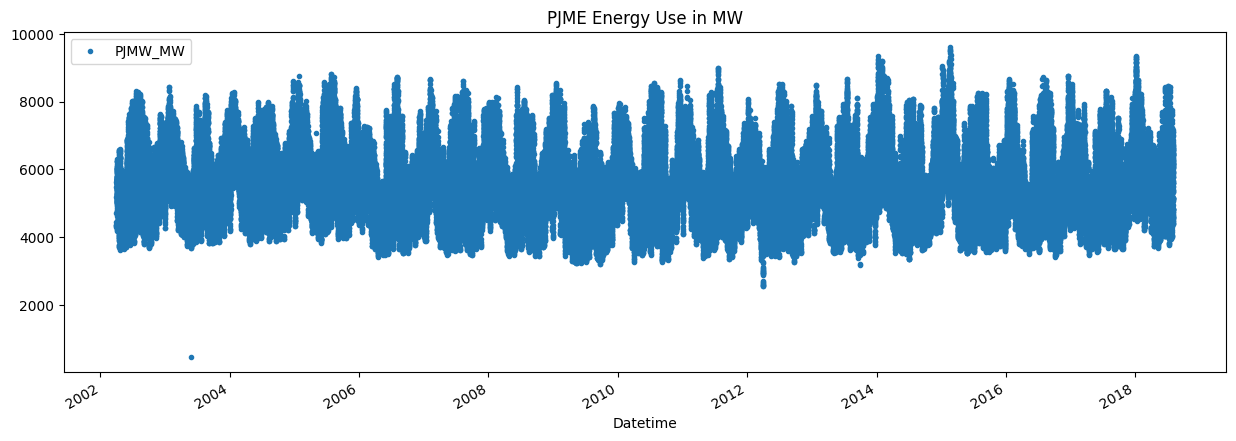

In [33]:
color_pal= sns.color_palette()
pjme.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='PJME Energy Use in MW')

## EDA

In [34]:
pjme['date'] = pjme.index
pjme['hour'] = pjme['date'].dt.hour
pjme['dayofweek'] = pjme['date'].dt.dayofweek
pjme['quarter'] = pjme['date'].dt.quarter
pjme['month'] = pjme['date'].dt.month
pjme['year'] = pjme['date'].dt.year
pjme['dayofyear'] = pjme['date'].dt.dayofyear
pjme['dayofmonth'] = pjme['date'].dt.day
pjme['weekofyear'] = pjme['date'].dt.weekofyear
pjme.drop(['date'], axis = 1, inplace=True)

In [35]:
pjme.head(50)

,PJMW_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,
2002-12-31 01:00:00,5077,1,1,4,12,2002,365,31,1
2002-12-31 02:00:00,4939,2,1,4,12,2002,365,31,1
2002-12-31 03:00:00,4885,3,1,4,12,2002,365,31,1
2002-12-31 04:00:00,4857,4,1,4,12,2002,365,31,1
2002-12-31 05:00:00,4930,5,1,4,12,2002,365,31,1
2002-12-31 06:00:00,5126,6,1,4,12,2002,365,31,1
2002-12-31 07:00:00,5493,7,1,4,12,2002,365,31,1
2002-12-31 08:00:00,5824,8,1,4,12,2002,365,31,1
2002-12-31 09:00:00,5962,9,1,4,12,2002,365,31,1


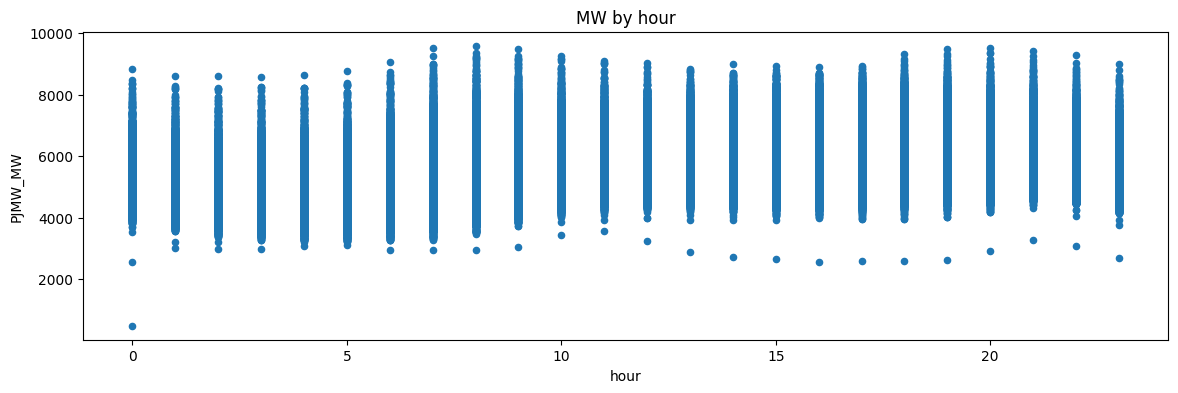

In [36]:
_ = pjme.plot(x='hour', y='PJMW_MW',kind='scatter',figsize=(14,4),title='MW by hour')

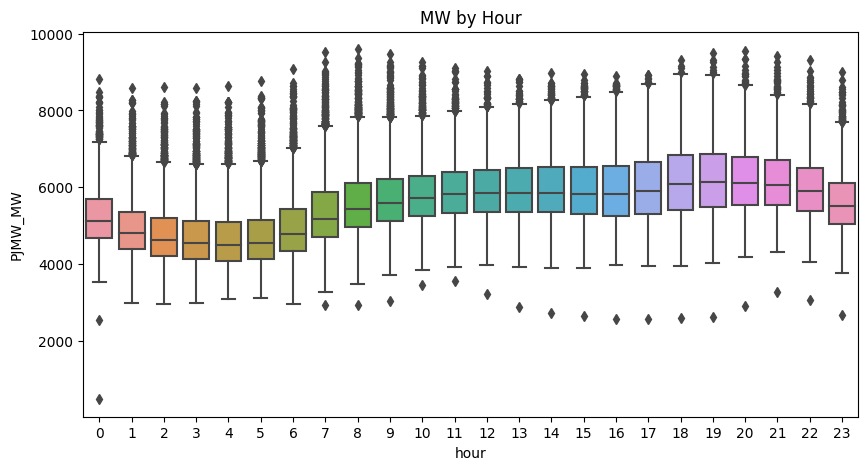

In [38]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=pjme, x='hour', y='PJMW_MW')
ax.set_title('MW by Hour')
plt.show()

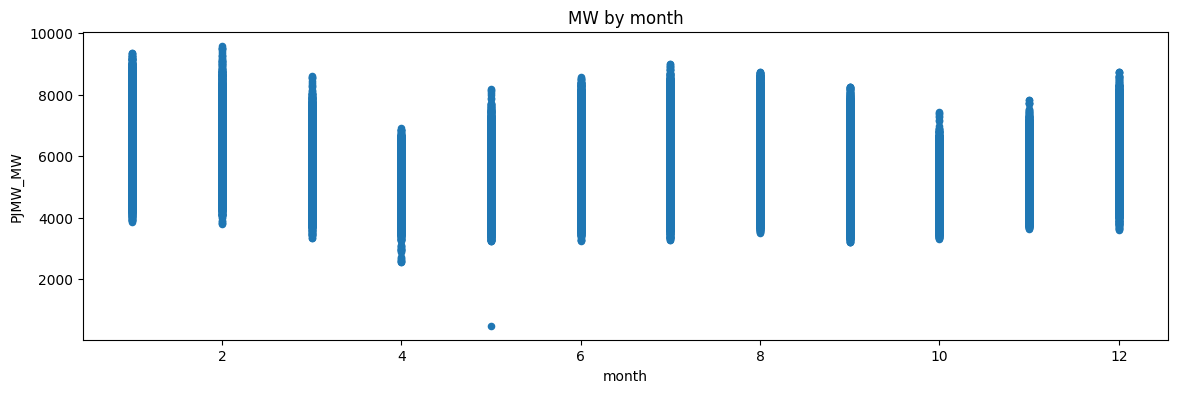

In [39]:
_ = pjme.plot(x='month', y='PJMW_MW',kind='scatter',figsize=(14,4),title='MW by month')

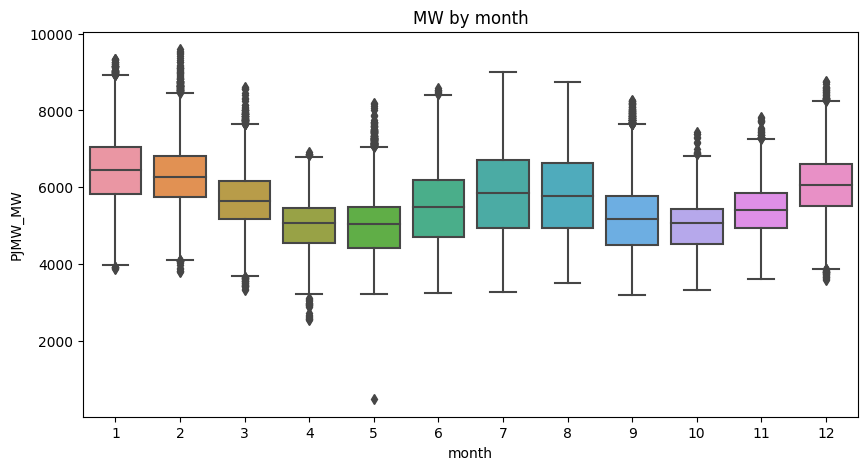

In [41]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=pjme, x='month', y='PJMW_MW')
ax.set_title('MW by month')
plt.show()

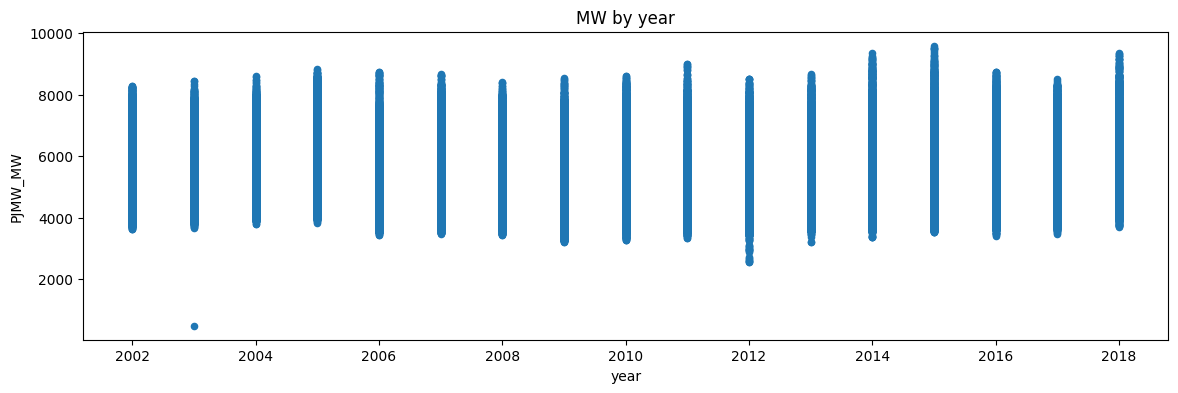

In [42]:
_ = pjme.plot(x='year', y='PJMW_MW',kind='scatter',figsize=(14,4),title='MW by year')

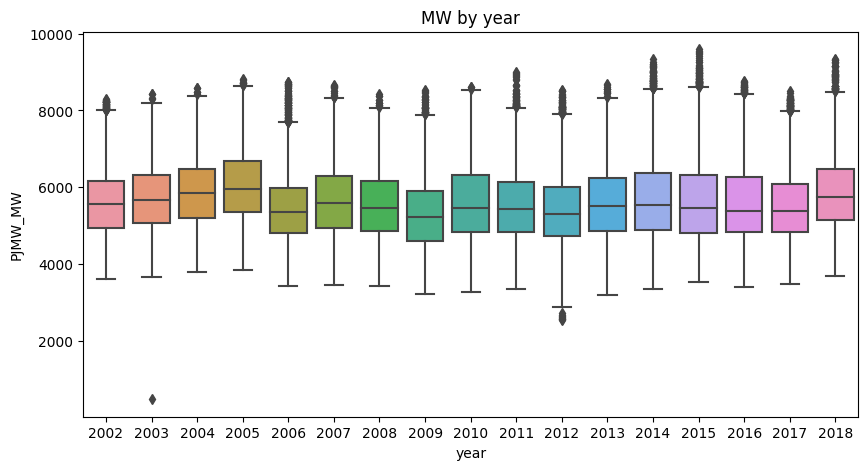

In [44]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=pjme, x='year', y='PJMW_MW')
ax.set_title('MW by year')
plt.show()

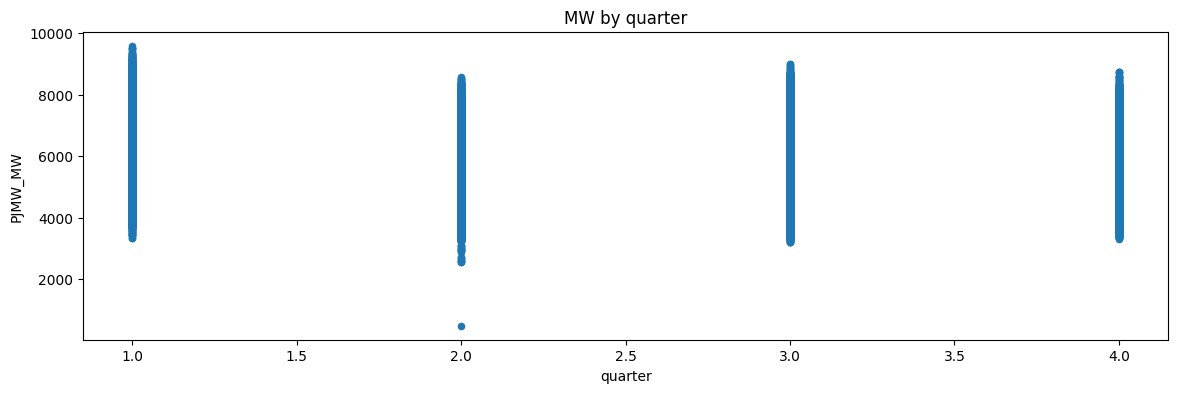

In [45]:
_ = pjme.plot(x='quarter', y='PJMW_MW',kind='scatter',figsize=(14,4),title='MW by quarter')

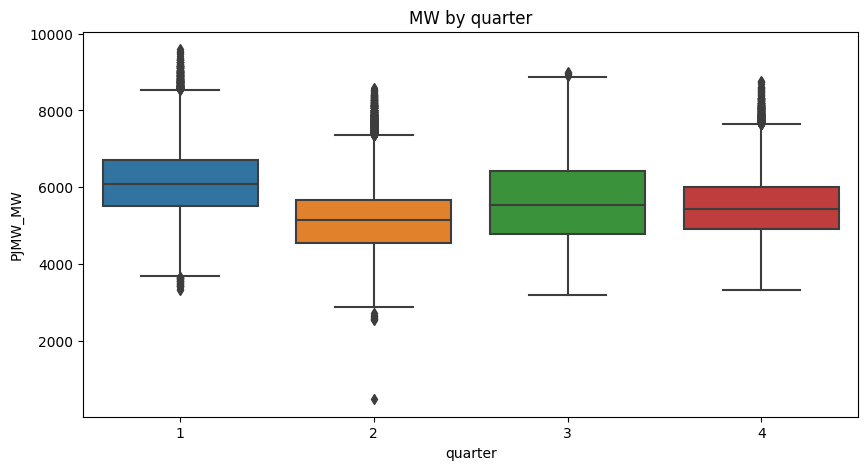

In [46]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=pjme, x='quarter', y='PJMW_MW')
ax.set_title('MW by quarter')
plt.show()

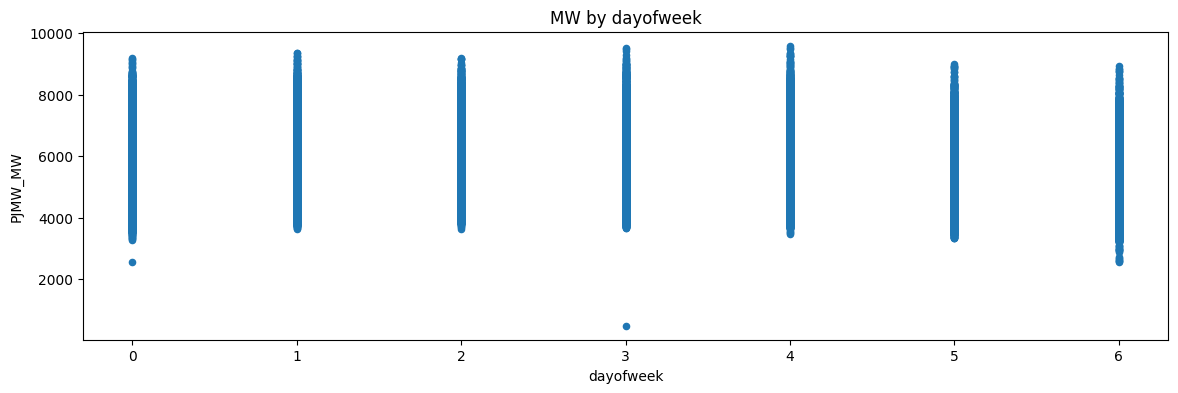

In [47]:
_ = pjme.plot(x='dayofweek', y='PJMW_MW',kind='scatter',figsize=(14,4),title='MW by dayofweek')

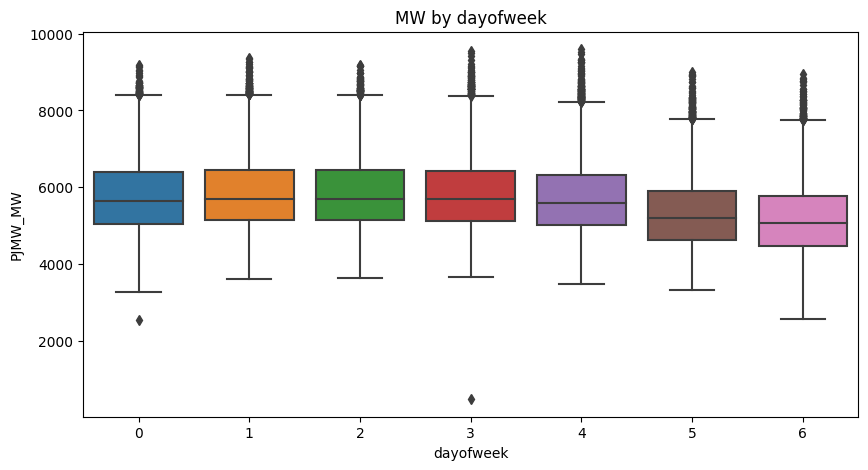

In [48]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=pjme, x='dayofweek', y='PJMW_MW')
ax.set_title('MW by dayofweek')
plt.show()

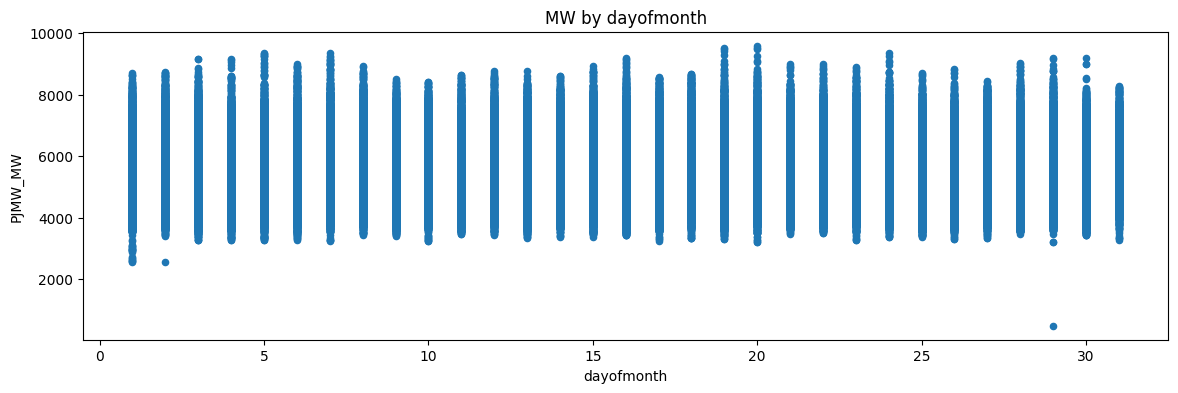

In [49]:
_ = pjme.plot(x='dayofmonth', y='PJMW_MW',kind='scatter',figsize=(14,4),title='MW by dayofmonth')

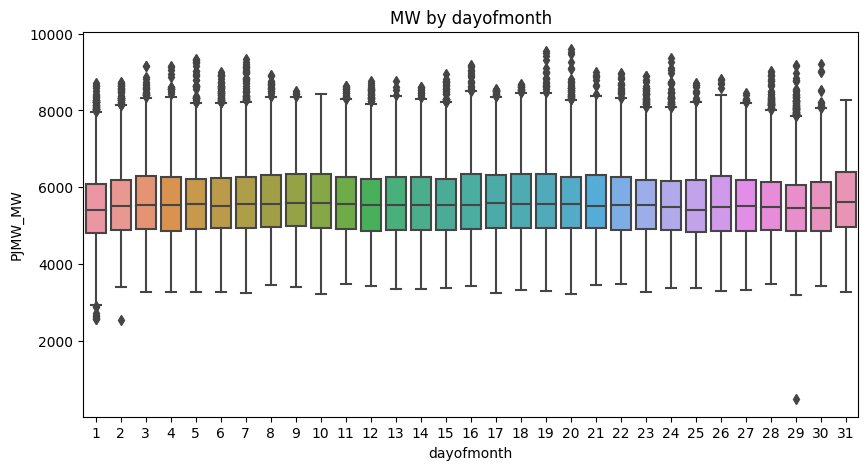

In [50]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=pjme, x='dayofmonth', y='PJMW_MW')
ax.set_title('MW by dayofmonth')
plt.show()

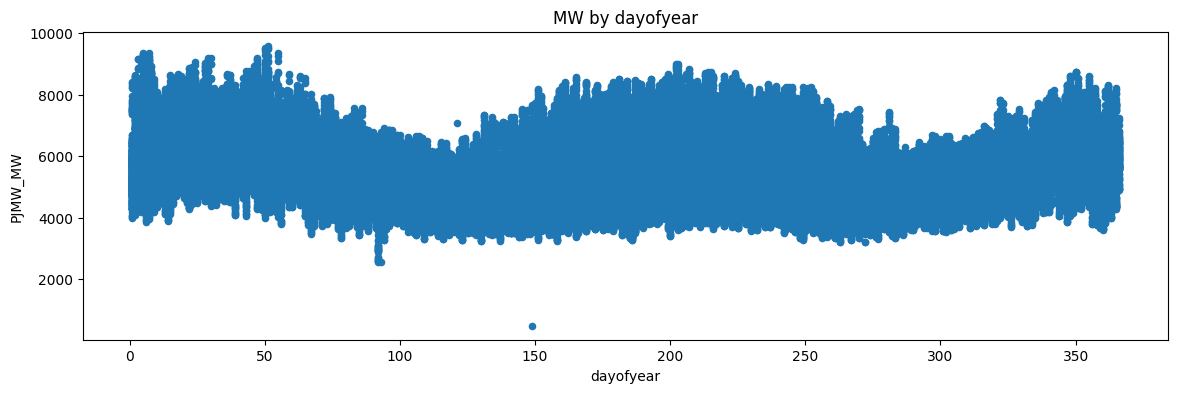

In [51]:
_ = pjme.plot(x='dayofyear', y='PJMW_MW',kind='scatter',figsize=(14,4),title='MW by dayofyear')

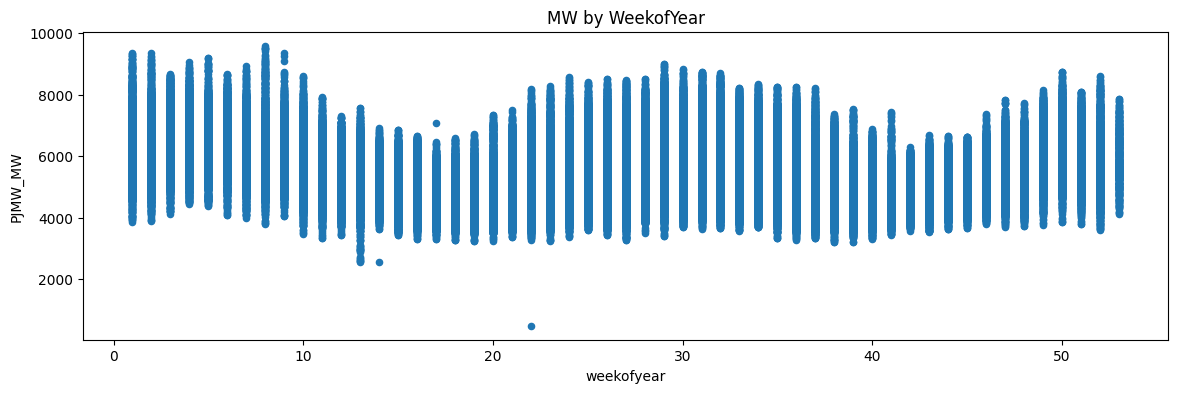

In [52]:
_ = pjme.plot(x='weekofyear', y='PJMW_MW',kind='scatter',figsize=(14,4),title='MW by WeekofYear')

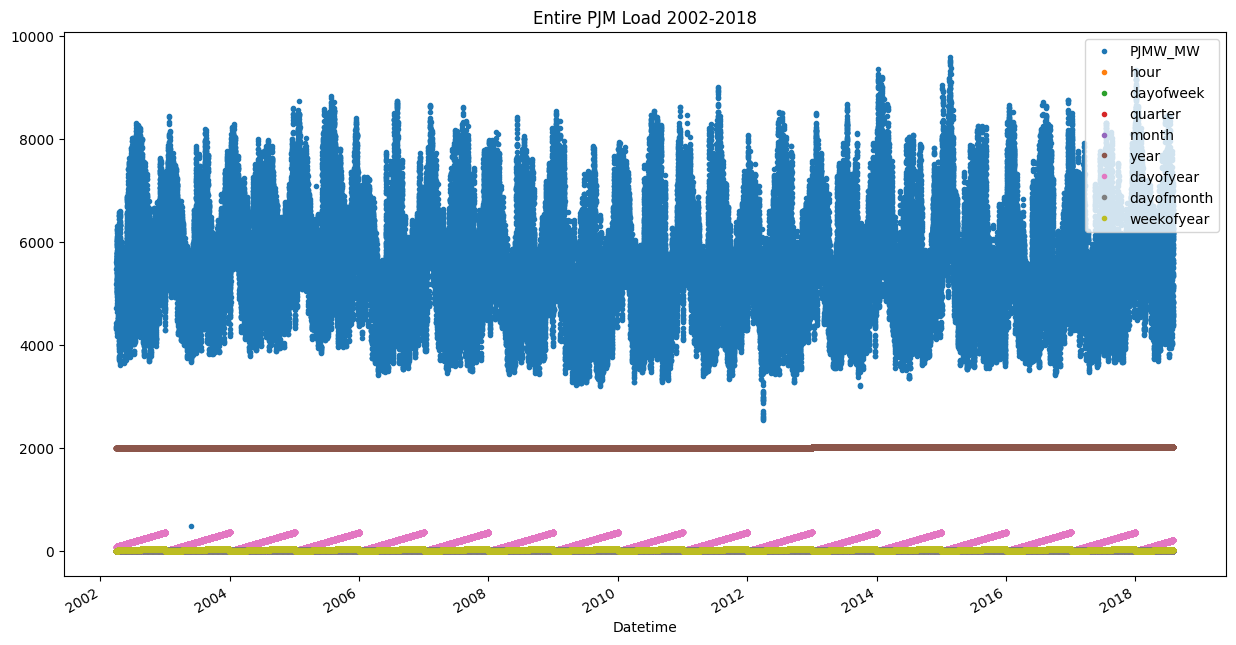

In [54]:
plot = pjme.plot(style='.', figsize=(15, 8), title='Entire PJM Load 2002-2018')

# Outlier Removal

In [55]:
Q1=pjme['PJMW_MW'].quantile(0.25)
Q2=pjme['PJMW_MW'].quantile(0.75)
QIR=Q2-Q1
QIR

1345.0

In [56]:
((pjme['PJMW_MW']>(Q2+QIR*1.5))|(pjme['PJMW_MW']<(Q1-QIR*1.5))).sum()

703

In [57]:
out=(pjme['PJMW_MW']>(Q2+QIR*1.5))|(pjme['PJMW_MW']<(Q1-QIR*1.5))
pjme[out]=np.nan
pjme=pjme.dropna().reset_index(drop=True)
pjme.isnull().sum()

PJMW_MW       0
hour          0
dayofweek     0
quarter       0
month         0
year          0
dayofyear     0
dayofmonth    0
weekofyear    0
dtype: int64

In [58]:
pjme.head(50)

,PJMW_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,5077.0,1.0,1.0,4.0,12.0,2002.0,365.0,31.0,1.0
1,4939.0,2.0,1.0,4.0,12.0,2002.0,365.0,31.0,1.0
2,4885.0,3.0,1.0,4.0,12.0,2002.0,365.0,31.0,1.0
3,4857.0,4.0,1.0,4.0,12.0,2002.0,365.0,31.0,1.0
4,4930.0,5.0,1.0,4.0,12.0,2002.0,365.0,31.0,1.0
5,5126.0,6.0,1.0,4.0,12.0,2002.0,365.0,31.0,1.0
6,5493.0,7.0,1.0,4.0,12.0,2002.0,365.0,31.0,1.0
7,5824.0,8.0,1.0,4.0,12.0,2002.0,365.0,31.0,1.0
8,5962.0,9.0,1.0,4.0,12.0,2002.0,365.0,31.0,1.0
9,6019.0,10.0,1.0,4.0,12.0,2002.0,365.0,31.0,1.0


In [59]:
pjme.corr()

,PJMW_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
PJMW_MW,1.000000,0.451850,-0.202290,-0.154769,-0.145409,-0.055847,-0.143813,-0.004469,-0.144647
hour,0.451850,1.000000,0.001510,0.000336,0.000624,-0.000504,0.000657,0.000442,0.000641
dayofweek,-0.202290,0.001510,1.000000,-0.000301,-0.000827,0.000321,-0.000847,-0.000337,-0.000870
quarter,-0.154769,0.000336,-0.000301,1.000000,0.970769,-0.073906,0.967531,0.011633,0.945178
month,-0.145409,0.000624,-0.000827,0.970769,1.000000,-0.073913,0.996428,0.009853,0.969849
year,-0.055847,-0.000504,0.000321,-0.073906,-0.073913,1.000000,-0.073641,-0.001274,-0.072546
dayofyear,-0.143813,0.000657,-0.000847,0.967531,0.996428,-0.073641,1.000000,0.093957,0.971305
dayofmonth,-0.004469,0.000442,-0.000337,0.011633,0.009853,-0.001274,0.093957,1.000000,0.067022
weekofyear,-0.144647,0.000641,-0.000870,0.945178,0.969849,-0.072546,0.971305,0.067022,1.000000


<AxesSubplot: >

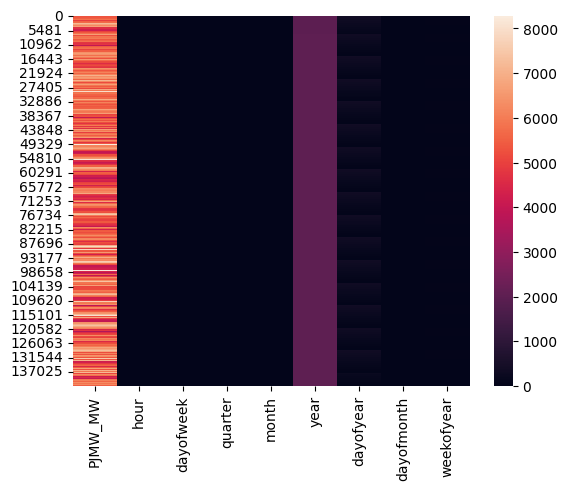

In [60]:
sns.heatmap(pjme)

## Definition of additive time series:
### Value = Base Level + Trend + Seasonality + Error

## Definition of multiplicative time Series:
### Value = Base Level x Trend x Seasonality x Error

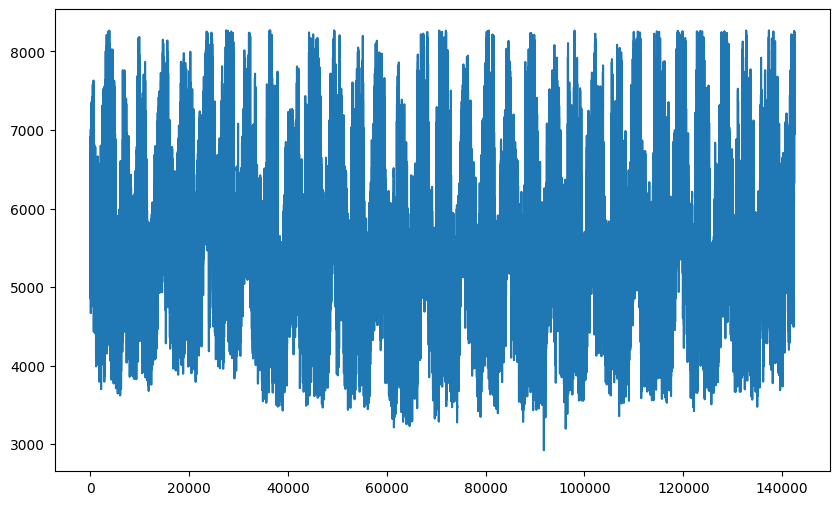

In [61]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (10,6)})
plt.plot(pjme['PJMW_MW'])

In [62]:
# Multiplicative Decomposition 
mul_result = seasonal_decompose(pjme['PJMW_MW'], model='multiplicative',period=1)

# Additive Decomposition
add_result = seasonal_decompose(pjme['PJMW_MW'], model='additive',period=1)

Text(0.5, 0.98, '\nMultiplicative Decompose')

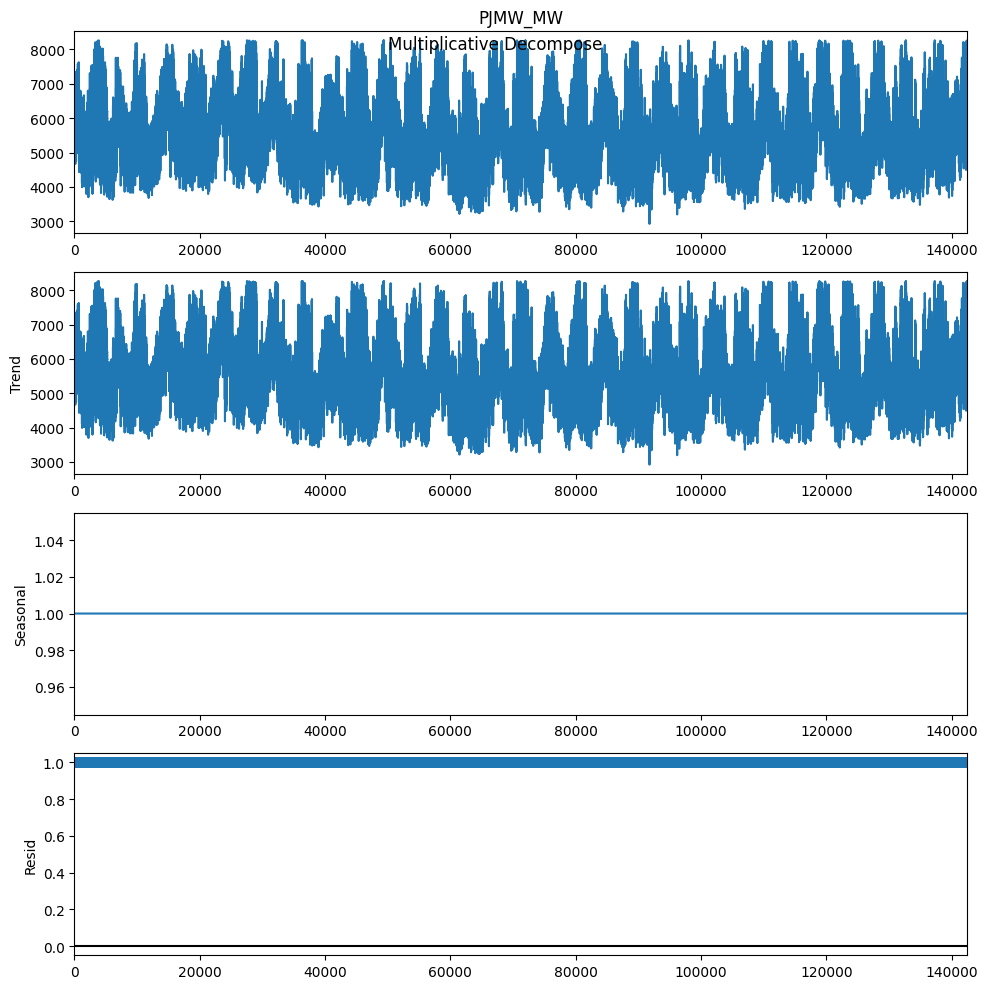

In [63]:
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
mul_result.plot().suptitle('\nMultiplicative Decompose', fontsize=12)

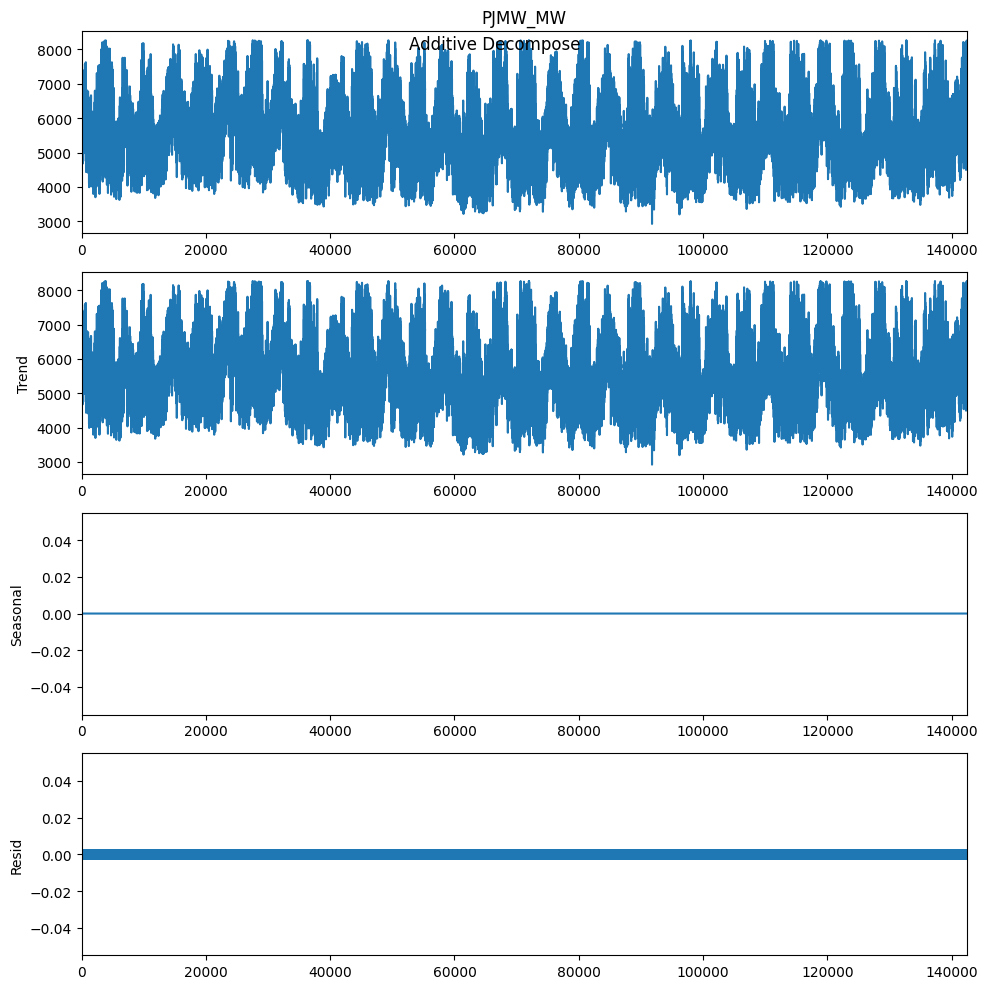

In [64]:
add_result.plot().suptitle('\nAdditive Decompose', fontsize=12)
plt.show()

In [65]:
#Additive
new_df_add = pd.concat([add_result.seasonal, add_result.trend, add_result.resid, add_result.observed], axis=1)
new_df_add.columns = ['seasoanilty', 'trend', 'residual', 'actual_values']
new_df_add.head(5)

,seasoanilty,trend,residual,actual_values
0,0.0,5077.0,0.0,5077.0
1,0.0,4939.0,0.0,4939.0
2,0.0,4885.0,0.0,4885.0
3,0.0,4857.0,0.0,4857.0
4,0.0,4930.0,0.0,4930.0


In [66]:
#Multiplicative
new_df_mult = pd.concat([mul_result.seasonal, mul_result.trend, mul_result.resid, mul_result.observed], axis=1)
new_df_mult.columns = ['seasoanilty', 'trend', 'residual', 'actual_values']
new_df_mult.head(5)

,seasoanilty,trend,residual,actual_values
0,1.0,5077.0,1.0,5077.0
1,1.0,4939.0,1.0,4939.0
2,1.0,4885.0,1.0,4885.0
3,1.0,4857.0,1.0,4857.0
4,1.0,4930.0,1.0,4930.0


## ADFULLER TEST FOR STATIONARITY

## Definition of stationarity - constant mean and variance

In [67]:
from statsmodels.tsa.stattools import adfuller

In [68]:
# ADF Test - nul hypothesis - non-stationary - if p-value < 5% reject null hypothesis
adfuller_result = adfuller(pjme.PJMW_MW.values, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -18.88294663478725
p-value: 0.0
Critial Values:
   1%, -3.4303959138502256
Critial Values:
   5%, -2.8615602932690853
Critial Values:
   10%, -2.5667808013854176


p-value < 5% reject null hypothesis 

Result>>>>Data is Stationary

In [71]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [73]:
df=pd.read_excel('PJMW_MW_Hourly.xlsx')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

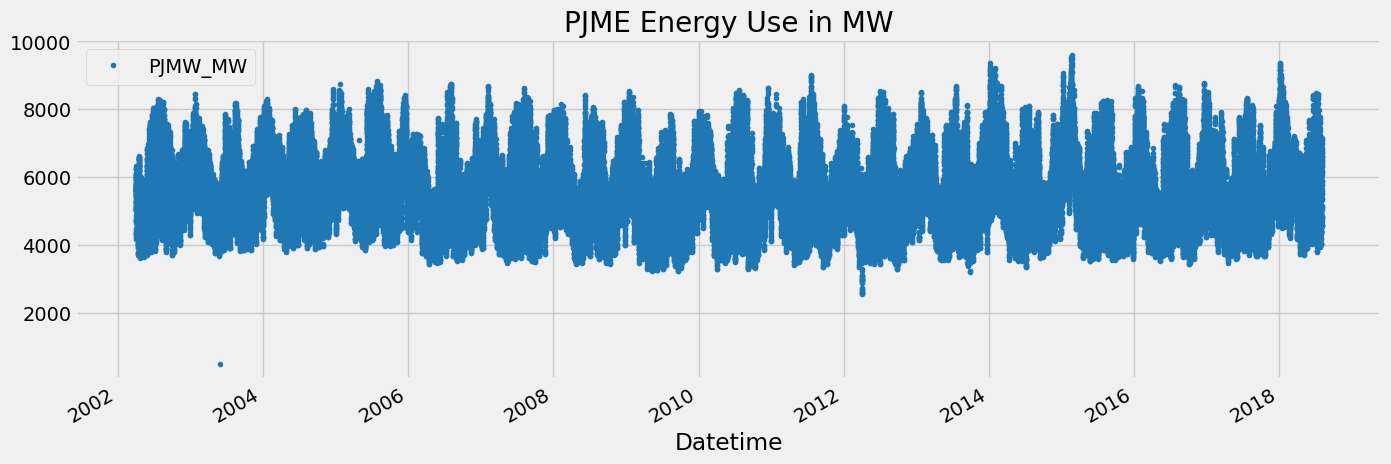

In [74]:
df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='PJME Energy Use in MW')
plt.show()

## Train / Test Split

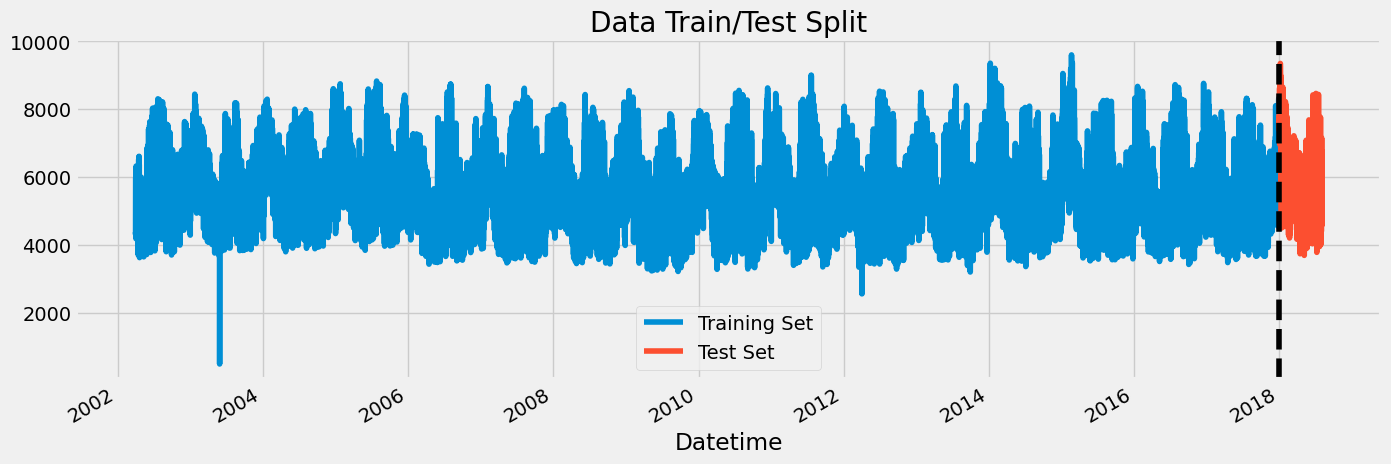

In [75]:
train = df.loc[df.index < '01-01-2018']
test = df.loc[df.index >= '01-01-2018']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2018', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

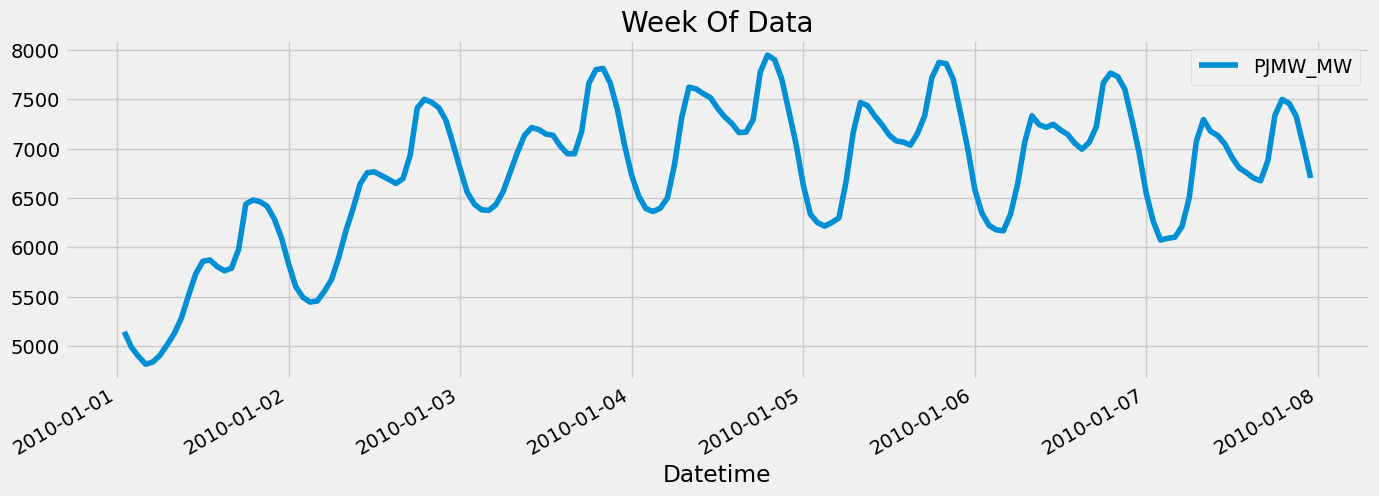

In [76]:
df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

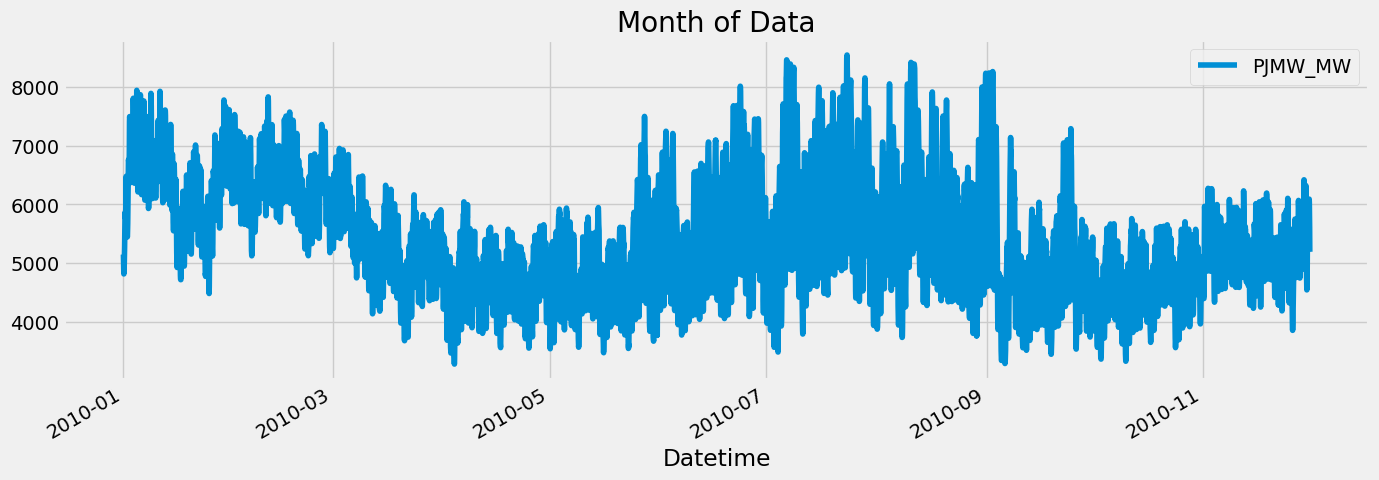

In [77]:
df.loc[(df.index > '01-01-2010') & (df.index < '12-01-2010')] \
    .plot(figsize=(15, 5), title='Month of Data')
plt.show()

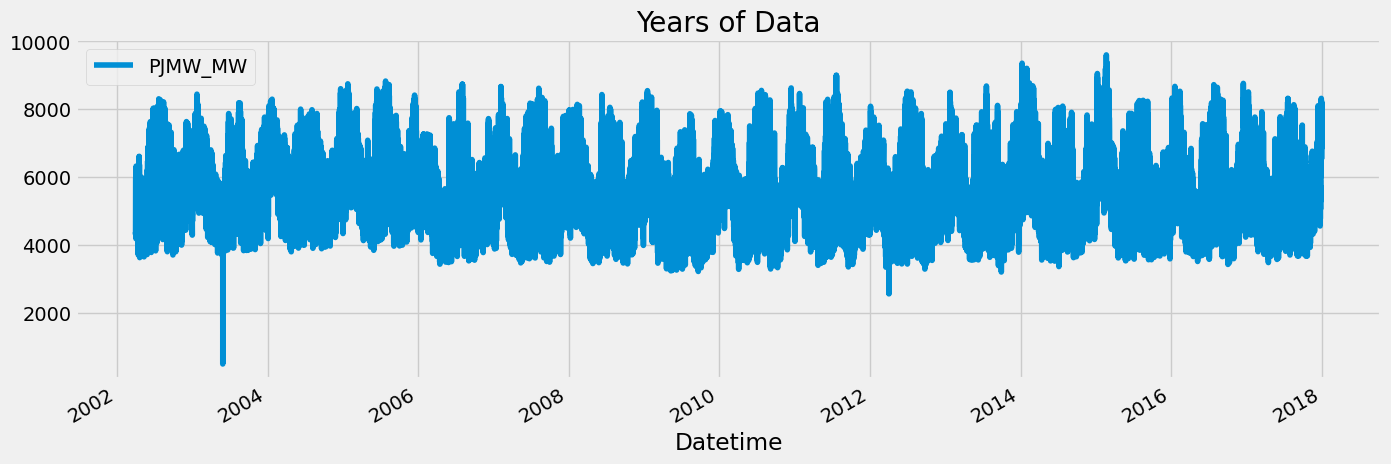

In [78]:
df.loc[(df.index > '01-01-2002') & (df.index < '01-01-2018')] \
    .plot(figsize=(15, 5), title='Years of Data')
plt.show()

## Feature Creation

In [79]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

## Create Model

In [80]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'PJMW_MW'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [81]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[01:31:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5621.49653	validation_1-rmse:5878.45989
[100]	validation_0-rmse:2156.23799	validation_1-rmse:2368.94493
[200]	validation_0-rmse:984.09442	validation_1-rmse:1201.47326
[300]	validation_0-rmse:656.92502	validation_1-rmse:871.22106
[400]	validation_0-rmse:575.15022	validation_1-rmse:773.79276
[500]	validation_0-rmse:549.35054	validation_1-rmse:745.33636
[600]	validation_0-rmse:536.48903	validation_1-rmse:733.62063
[700]	validation_0-rmse:528.26466	validation_1-rmse:731.39508
[719]	validation_0-rmse:527.02619	validation_1-rmse:732.22578


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

## Feature Importance

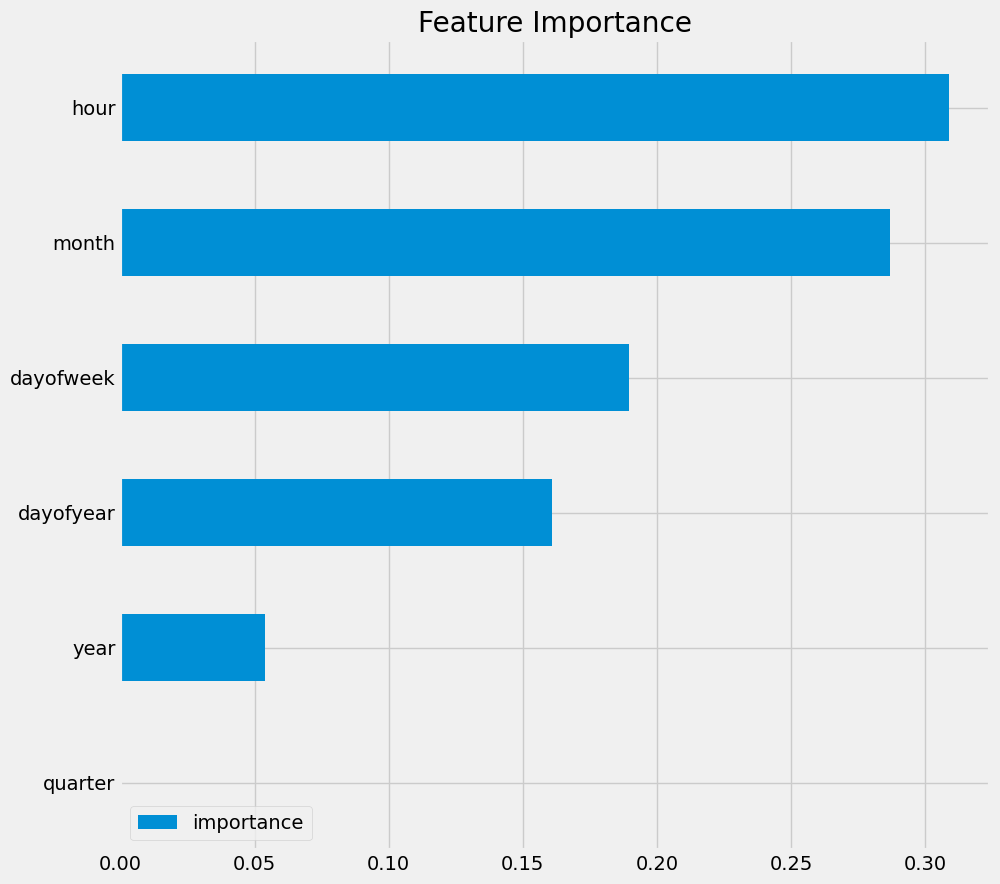

In [82]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

## Forecast on Test

In [1]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['PJMW_MW']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Date and Prediction')
plt.show()

NameError: name 'reg' is not defined

### First Month Of January 2018

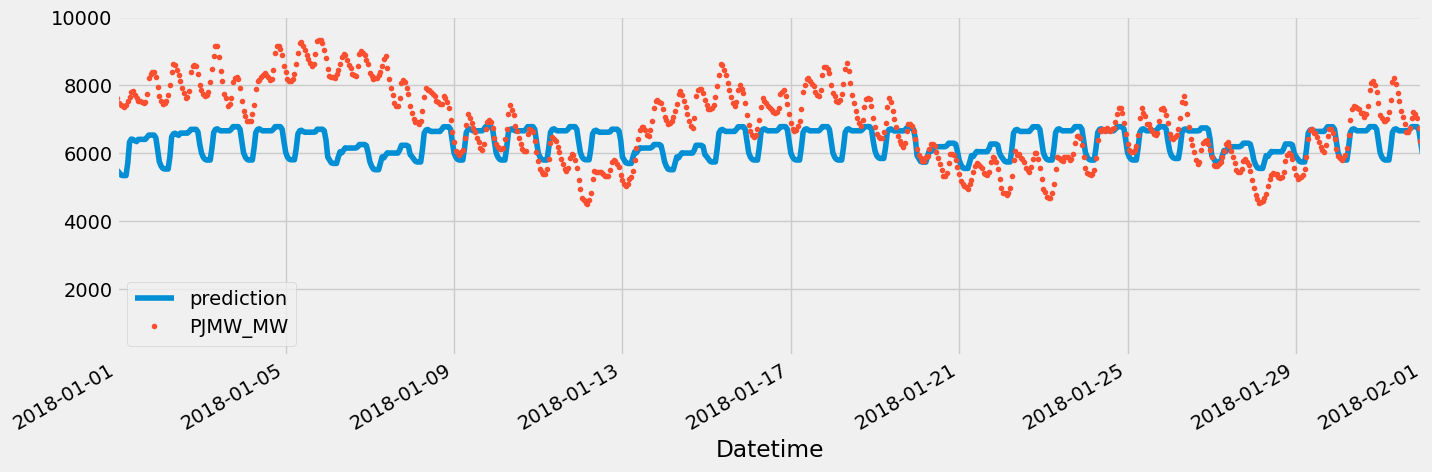

In [84]:
_, ax = plt.subplots(1)
df[['prediction','PJMW_MW']].plot(ax=ax, style=['-','.'],figsize=(15, 5))
ax.set_xbound(lower='01-01-2018', upper='02-01-2018')

### First Week of January 2018

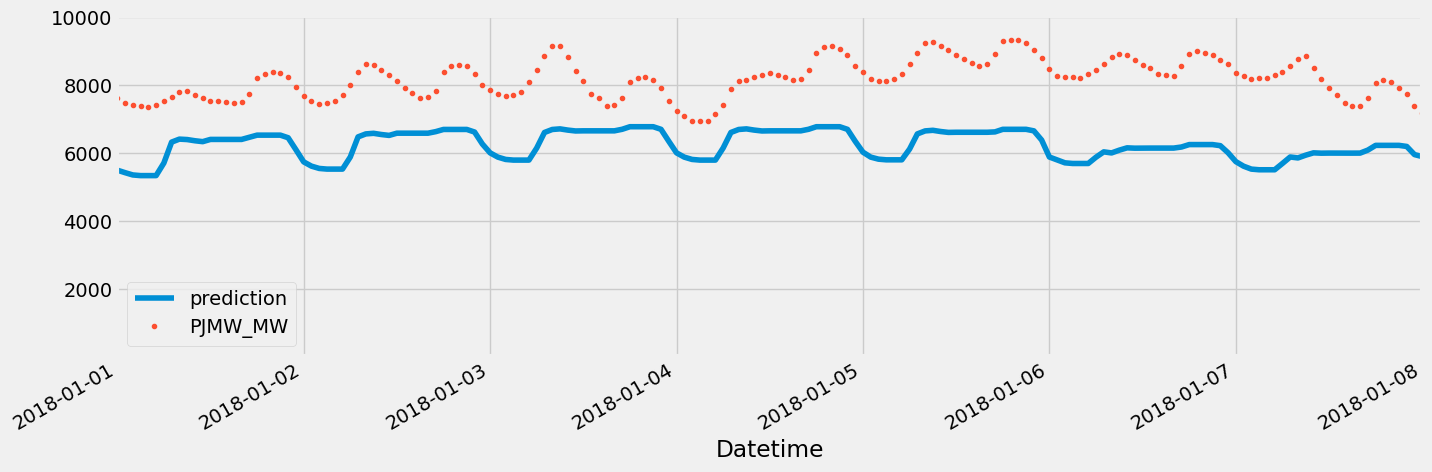

In [85]:
_, ax = plt.subplots(1)
df[['prediction','PJMW_MW']].plot(ax=ax, style=['-','.'],figsize=(15, 5))
ax.set_xbound(lower='01-01-2018', upper='01-08-2018')

### April Week of 2018

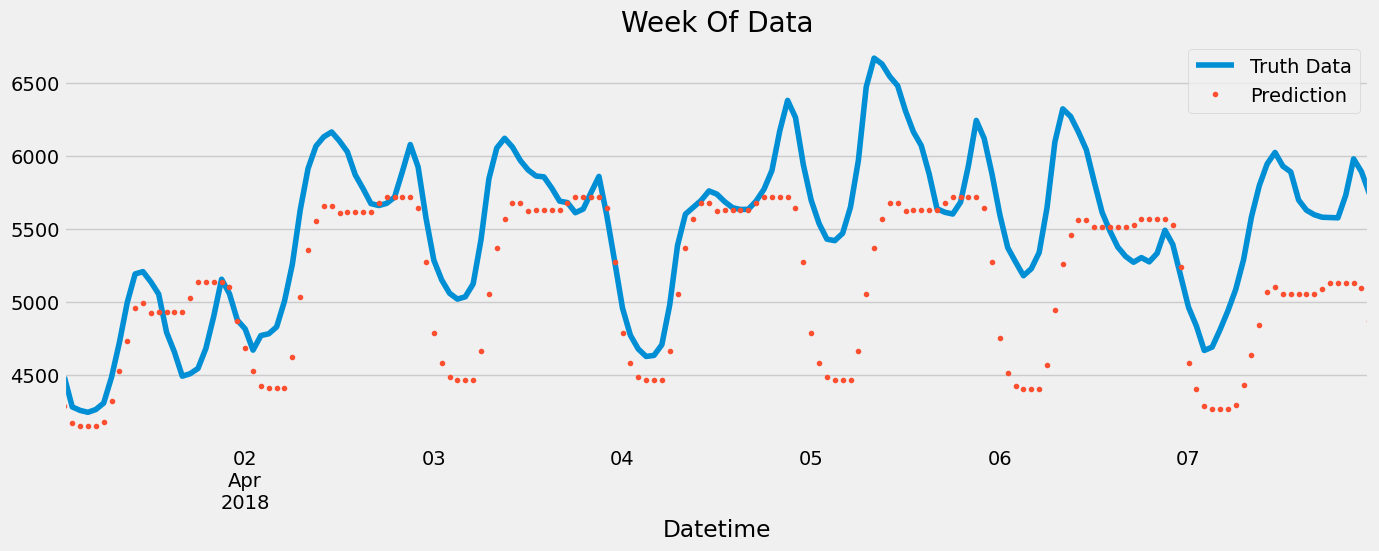

In [86]:
ax = df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['PJMW_MW'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

## Score RMSE / MSE / MAE

In [87]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)
score = np.sqrt(mean_squared_error(test['PJMW_MW'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 730.24


In [88]:
mean_squared_error(y_true=test['PJMW_MW'],
                   y_pred=test['prediction'])

533251.9546143909

In [89]:
mean_absolute_error(y_true=test['PJMW_MW'],
                   y_pred=test['prediction'])

541.7622088851216

## Look at the worst and best predicted days

In [90]:
test['error'] = test['PJMW_MW'] - test['prediction']
test['abs_error'] = test['error'].apply(np.abs)

In [91]:
error_by_day = test.groupby(['year','month','dayofmonth']).mean()[['PJMW_MW','prediction','error','abs_error']]

In [92]:
error_by_day.head(20)

PJMW_MW   prediction        error    abs_error
year month dayofmonth                                                    
2018 1     1           7735.166667  6123.050781  1612.115906  1612.115906
           2           8044.833333  6303.653809  1741.179708  1741.179708
           3           8077.000000  6445.585938  1631.414246  1631.414246
           4           8076.500000  6445.585938  1630.914246  1630.914246
           5           8794.583333  6412.510254  2382.072998  2382.072998
           6           8579.375000  6037.998047  2541.377197  2541.377197
           7           8067.041667  5913.493164  2153.548645  2153.548645
           8           7383.250000  6418.631836   964.618001   964.618001
           9           6503.500000  6445.585938    57.914246   237.916606
           10          6509.083333  6445.585938    63.497579   365.079407
           11          5793.083333  6445.585938  -652.502421   652.502421
           12          5243.791667  6412.510254 -1168.718669  1168.718669
           13          6375.333333  6037.998047   337.335531   685.326131
           14          7329.541667  5913.493164  1416.048645  1416.048645
           15          7776.750000  6418.631836  1358.118001  1358.118001
           16          7220.458333  6445.585938   774.872579   774.872579
           17          7731.791667  6445.585938  1286.205912  1286.205912
           18          7587.666667  6445.585938  1142.080912  1142.080912
           19          6731.041667  6451.373047   279.668538   428.132243
           20          5839.791667  6076.860352  -237.068929   321.077108

In [93]:
error_by_day.tail(20)

PJMW_MW   prediction       error   abs_error
year month dayofmonth                                                  
2018 7     15          6022.666667  5292.711426  729.955139  729.955139
           16          6684.458333  5820.822754  863.635600  872.790588
           17          6463.750000  5847.571777  616.178406  618.027608
           18          5820.250000  5847.571777  -27.321594  303.072571
           19          5909.166667  5847.571777   61.595072  393.314514
           20          5998.791667  5774.409668  224.382222  349.069071
           21          5230.750000  5390.788086 -160.037903  247.131368
           22          5025.500000  5292.711426 -267.211528  274.872294
           23          5900.041667  5820.822754   79.218933  216.964457
           24          6142.666667  5847.571777  295.095072  305.562154
           25          6036.208333  5847.571777  188.636739  247.500509
           26          6216.458333  5847.571777  368.886739  447.394592
           27          5978.750000  5774.409668  204.340556  284.551493
           28          5485.791667  5390.788086   95.003764  255.362610
           29          5293.833333  5292.711426    1.121806  339.460999
           30          5492.708333  5820.822754 -328.114400  344.755147
           31          5660.750000  5847.571777 -186.821594  226.849874
     8     1           5959.708333  5847.571777  112.136739  239.901754
           2           5805.041667  5847.571777  -42.529928  164.111674
           3           5489.000000  5089.087402  399.912598  399.912598

## Over feorecasted days

In [94]:
error_by_day.sort_values('error', ascending=True).head(10)

PJMW_MW   prediction        error    abs_error
year month dayofmonth                                                    
2018 2     21          5044.958333  6351.544434 -1306.586283  1306.586283
           20          5247.708333  6449.468750 -1201.760356  1201.760356
     1     12          5243.791667  6412.510254 -1168.718669  1168.718669
     2     15          5301.000000  6445.585938 -1144.585754  1144.585754
           16          5387.583333  6451.373047 -1063.789795  1063.789795
     1     22          5508.875000  6418.631836  -909.756999   909.756999
     2     22          5483.041667  6294.286133  -811.244649   811.244649
     1     23          5648.125000  6445.585938  -797.460754   797.460754
     2     25          4994.541667  5780.280762  -785.738932   785.738932
           26          5491.833333  6267.332520  -775.499227   775.499227

We can see, 1st worst day: 21st Feb,2018 - Wednesday                                                                            
    3rd worst day: 12 January,2018 - Friday                                                                                   
        5th worst day: 16 Feb,2018 - Friday  
            Next Worst Day: 25 Feb 2018 - Sunday                                                                                

We should consider Friday in our analysis.

## Worst Absolute Predicted days

In [95]:
error_by_day.sort_values('abs_error', ascending=False).head(10)

PJMW_MW   prediction        error    abs_error
year month dayofmonth                                                    
2018 1     6           8579.375000  6037.998047  2541.377197  2541.377197
           5           8794.583333  6412.510254  2382.072998  2382.072998
           7           8067.041667  5913.493164  2153.548645  2153.548645
           2           8044.833333  6303.653809  1741.179708  1741.179708
           3           8077.000000  6445.585938  1631.414246  1631.414246
           4           8076.500000  6445.585938  1630.914246  1630.914246
           1           7735.166667  6123.050781  1612.115906  1612.115906
           14          7329.541667  5913.493164  1416.048645  1416.048645
           15          7776.750000  6418.631836  1358.118001  1358.118001
     2     21          5044.958333  6351.544434 -1306.586283  1306.586283

## Best Absolute Predicted days

In [96]:
error_by_day.sort_values('abs_error', ascending=True).head(10)

PJMW_MW   prediction       error   abs_error
year month dayofmonth                                                  
2018 5     11          5057.458333  5075.638184  -18.179993  113.227641
     4     14          4635.250000  4692.963867  -57.714091  118.934428
           24          5100.375000  5179.421387  -79.046529  125.671529
     5     10          5214.541667  5179.421387   35.120138  136.043437
           18          5109.916667  5075.638184   34.278341  137.054016
     3     6           6260.458333  6176.995117   83.463094  147.564494
     5     8           5053.750000  5179.421387 -125.671529  149.320821
     2     1           6313.083333  6445.585938 -132.502421  150.800476
     4     15          4468.333333  4593.974121 -125.640940  155.549225
           13          4934.375000  5077.609375 -143.234517  158.736348

## Plotting Best/Worst predicted Days

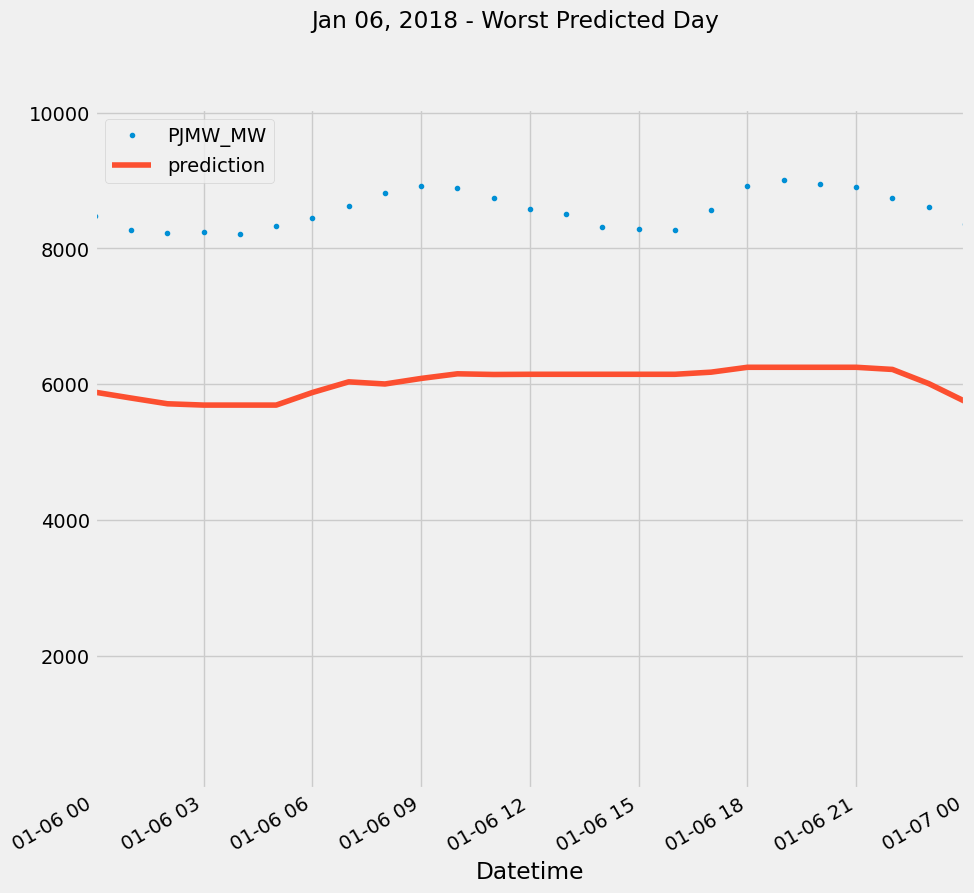

In [97]:
_, ax = plt.subplots(1)
df[['PJMW_MW','prediction']].plot(ax=ax, style=['.','-'])
ax.set_xbound(lower='01-06-2018', upper='01-07-2018')
plot = plt.suptitle('Jan 06, 2018 - Worst Predicted Day')

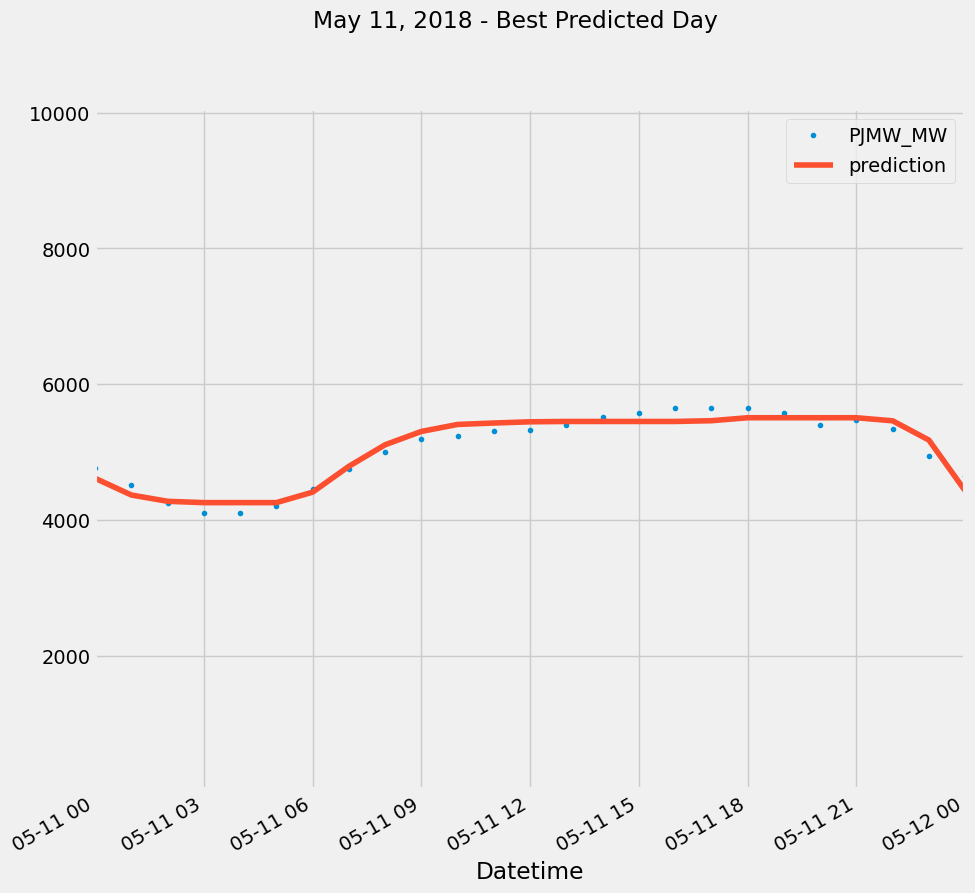

In [98]:
_, ax = plt.subplots(1)
df[['PJMW_MW','prediction']].plot(ax=ax, style=['.','-'])
ax.set_xbound(lower='05-11-2018', upper='05-12-2018')
plot = plt.suptitle('May 11, 2018 - Best Predicted Day')